# Project: WeRateDogs Data Wrangling

## *Table of contents*

- **INTRODUCION**

- **DATA WRANGLING**
>Data Gathering<br>
>Data Assessing<br>
>Data Cleaning<br>
>Data Storing<br>

- **DATA ANALYSIS & VISUALIZATION**
> Popular dog names<br>
> Relationship between favorite count and retweet count<br>
> Dog stage vs Rating<br>
> Source of tweets<br>
> Top dogs breeds identified<br>
> Top dogs breeds with high confident probability<br>
> Number of image provided vs Confident probability<br>
> Dog breed identification algorithm performance

# Introduction:

Using Python and its libraries to wrangle WeRateDogs Twitter data, including: 
- gather data from a variety of sources and in a variety of formats, 
- assess its quality and tidiness,
- clean and save the data.<br>

We are also going to creat data investigation and visualisation to bring some insights of the dataset.

In [1]:
#import major libraries
import requests
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gathering Data

### 1-Import csv Data - manually download

The WeRateDogs Twitter archive file contains basic tweet data for all 5000+ of their tweets, but not everything. <br>
One column the archive does contain though: each tweet's text, including rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." <br>
Here, of the 5000+ tweets, we extracted tweets with ratings only (there are 2356).

The dogtionary
- **doggo**: a big pupper, usually older or a pupper that appears to have its life in order: probably understands taxes and whatnot.
- **pupper**: a small doggo, usually younger or a doggo that is inexperienced, unfamiliar, in any way unprepared for the responsibilities associated with being a doggo.
- **puppo**: a transitional phase between pupper and doggo: a teenager or a dog with a mixed bag of both pupper and doggo tendencies.
- **floof**: any dog with seemingly excess fur.
- **belp**: an extremely subtle act that occurs without the knowledge of the one who slips, including one's tongue protruding ever so slightly from the mouth, usually just noticeable enough that it attracts the attention it deserves.

In [2]:
# load CSV file and view dataframe to have a general idea
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2-Import tsv Data - Programmatically download
Using Requests Library to download the dog image prediction files with URL provided on Udacity server.<br>
The table is full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

- tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
- p1_conf is how confident the algorithm is in its #1 prediction → 95%
- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
- p2 is the algorithm's second most likely prediction → Labrador retriever
- p2_conf is how confident the algorithm is in its #2 prediction → 1%
- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE

In [3]:
# programmatically download
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# create directory if it doesn't already exist
folder_name = 'image-predictions.tsv'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# save downloaded data to a file named'image-predictions.tsv' with content from response .content 
# use .content if the response is in binary instead of text, else use .text
with open('image-predictions.tsv', "wb") as file: file.write(response.content)
    
# import data
df_breeds = pd.read_csv('image-predictions.tsv', sep="\t")
df_breeds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3-Import txt Data by using JSON library

Using TWEEPY and JSON libraries for tweets querying 

In [4]:
#import libraries
import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys
import os
import time

#import API key data
df_api = pd.read_csv('customerAPIkey.csv')

#authentication pieces
consumer_key = df_api.iloc[0,1]
consumer_secret = df_api.iloc[1,1]
access_token = df_api.iloc[2,1]
access_secret = df_api.iloc[3,1]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#use a code timer, since Twitter's rate limits are divided into 15 minutes interval, while query all the tweet IDs in the WerateDogs Twitter archive requires 20-30 minutes of running time.
api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [5]:
# query tweets by using tweet_id from the df_archive
tweet_ids = list(df_archive.tweet_id)

tweet_data = {}
for tweet_id in tweet_ids:
    try:
        tweet_status = api.get_status(tweet_id,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        # extracting the JSON text and assigning it as value to key(tweet_id) for the dictionary
        tweet_data[str(tweet_id)] = tweet_status._json       
    except: 
        print("Error for: " + str(tweet_id))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 770743923962707968


Rate limit reached. Sleeping for: 624


Error for: 754011816964026368


Rate limit reached. Sleeping for: 617


In [6]:
#creat Twitter JSON file and convert the dict format to string
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [7]:
#load Json file and read the dataframe
df_tweet = pd.read_json('tweet_json.txt',orient='index')
df_tweet.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2545,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,508,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,129,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,296,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,139,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,107,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


## Assessing - Visual and Programmatic

### *df_archive*

In [8]:
# check the type of each dataframe
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
# check the value distribution of rating
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# check the duplicated
df_archive.duplicated().sum()

0

In [11]:
# check dogs' name
df_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Toby           7
an             7
Buddy          7
Daisy          7
Bailey         7
Oscar          6
Jack           6
Milo           6
Bella          6
Scout          6
Koda           6
Dave           6
Leo            6
Jax            6
Stanley        6
Rusty          6
Phil           5
            ... 
Jett           1
Bauer          1
Flash          1
Pawnd          1
Caryl          1
Clybe          1
Kody           1
Rose           1
Pluto          1
Julius         1
Shawwn         1
Vinscent       1
Beya           1
Tupawc         1
Alejandro      1
Sunshine       1
Brooks         1
Emanuel        1
Grady          1
Tyrus          1
Timofy         1
Brian          1
Brownie        1
Spanky         1
Newt           1
Patch          1
Jiminus        1
such          

In [12]:
# check if all tweets were rated
df_archive.rating_numerator.isnull().sum()

0

> **Quality Issues**<br>
- lots of missing values in the columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- column 'text' containts url
- some valuese of rating_numerator are extremly superior to 10
- some values of rating_numerator are inferior to 10, while they should normally always be greater than 10
- some values of rating_demonator are not egal to 10
- unusual names for some dogs:'None', 'a' etc 
- missing value for dog categories

> **Tidiness Issues** <br>
- remove the columns which are not necessary for the analysis.
- combine dogs' dummies variables (doggo, floofer, pupper and puppo) to one column named 'dog_category'.

### *df_breeds*

In [13]:
#check general information about df_breeds
df_breeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
#generate the descriptive statistics of confidence probability
df_breeds.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
df_breeds.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
teddy                         18
Maltese_dog                   18
beagle                        18
Shetland_sheepdog             18
Eskimo_dog                    18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

> **Quality Issues**<br>
- the first letter of dogs' breeds (p1, p2, p3) are mixed of lowercase and uppercase
- remove '_' in dogs' breed
- some images were not recognised as a dog, but web_site, seat_belt...

### *df_tweet*

In [16]:
#check general information about df_tweet
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
geo                              0 non-null float64
id                               2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  23

In [17]:
#generate descriptive statistics
df_tweet.describe()

,contributors,coordinates,favorite_count,favorited,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,truncated
count,0.0,0.0,2342.000000,2342.0,0.0,2.342000e+03,2.342000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2342.000000,2206.0,2206.0,2.600000e+01,2.600000e+01,2342.000000,2342.0,2342.000000
mean,NaN,NaN,8005.459009,0.0,NaN,7.422212e+17,7.422212e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.013237,0.0,0.0,8.113972e+17,8.113972e+17,2954.503416,0.0,0.105465
std,NaN,NaN,12367.793780,0.0,NaN,6.832408e+16,6.832408e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.114311,0.0,0.0,6.295843e+16,6.295843e+16,4962.348173,0.0,0.307218
min,NaN,NaN,0.000000,0.0,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.000000,0.0,0.0,6.721083e+17,6.721083e+17,0.000000,0.0,0.000000
25%,NaN,NaN,1384.250000,0.0,NaN,6.783509e+17,6.783509e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.000000,0.0,0.0,7.761338e+17,7.761338e+17,593.500000,0.0,0.000000
50%,NaN,NaN,3487.500000,0.0,NaN,7.186224e+17,7.186224e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.281173e+17,8.281173e+17,1379.500000,0.0,0.000000
75%,NaN,NaN,9817.500000,0.0,NaN,7.986971e+17,7.986971e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.637581e+17,8.637581e+17,3447.750000,0.0,0.000000
max,NaN,NaN,165042.000000,0.0,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,1.000000,0.0,0.0,8.860534e+17,8.860534e+17,84240.000000,0.0,1.000000


In [18]:
#verify if there is duplicate for 'id'
df_tweet.id.duplicated().sum()

0

> **Quality Issues**<br>
- 14 (2356-2342) tweet_id(s) did not work by API
- unuseful columns without values
- rename the column 'id' to 'tweet_id'<br>

> **Tidiness Issues**<br>
- remove the useless column for better analysis<br>

## Cleaning

In [19]:
#creat copies of the dataframes to clean
df_archive_clean = df_archive.copy()
df_breeds_clean = df_breeds.copy()
df_tweet_clean = df_tweet.copy()

### *Table df_archive*

> **Quality Issues**<br>
- lots of missing values in the columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- useless text in the 'source'
- convert rating from int to float
<br><br>
- some valuese of rating_numerator are extremly superior to 10
- some values of rating_numerator are inferior to 10, while they should normally always be greater than 10
- some values of rating_demonator are not egal to 10 <br>
>> *checked the ratings extracted from text, nothing really can be done because the majority of the extraction is correct, owners decided to rate their dogs at unnormal rates* 
<br><br>
- unusual names for some dogs:'None', 'a' etc 
- missing value for dog categories<br>

> **Tidiness Issues** <br>
- remove the columns which are not necessary for the analysis.
- combine dogs' dummies variables (doggo, floofer, pupper and puppo) to one column named 'dog_category'.

In [20]:
#exctract only columns in need for this analysis
df_archive_clean = df_archive_clean[['tweet_id', 'source', 'text','rating_numerator', 'rating_denominator', 'name', 
                                     'doggo', 'floofer', 'pupper', 'puppo' ]].copy()

#test
list(df_archive_clean)

['tweet_id',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [21]:
#check the string structure of 'source'
df_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [22]:
#remove useless text information in 'source'
df_archive_clean.source = df_archive_clean.source.apply(lambda st: st[st.find('">')+2:st.find("</")])

#test
df_archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [23]:
#column 'text' containts url: remove all text starting from https 
df_archive_clean.text = df_archive_clean.text.str.partition('https')[0]

#test
df_archive_clean.text[66]

'This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) '

In [24]:
#convert rating from int to float
df_archive_clean.rating_numerator = df_archive_clean.rating_numerator.astype(float)
df_archive_clean.rating_denominator = df_archive_clean.rating_denominator.astype(float)

#test
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 184.1+ KB


In [25]:
#creat a new column of relative rating (fraction of rating_numerator and rating_denominator * 10) due to unusual rating from owners
df_archive_clean = df_archive_clean.assign(rating=(df_archive_clean.rating_numerator / df_archive_clean.rating_denominator)*10)

#test
df_archive_clean.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,13.0
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,13.0
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,12.0
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None,13.0
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,12.0


In [26]:
# convert dummy variables (doggo, floofer, pupper and puppo) to a new created categorical variable named 'stage using 
df_archive_clean = df_archive_clean.assign(stage = df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']]
                                           .apply(lambda x: ''.join(x), axis=1))


df_archive_clean.stage.replace("NoneNoneNoneNone","None ", inplace=True)
df_archive_clean.stage.replace("doggoNoneNoneNone","doggo", inplace=True)
df_archive_clean.stage.replace("NoneflooferNoneNone","floofer", inplace=True)
df_archive_clean.stage.replace("NoneNonepupperNone","pupper", inplace=True)
df_archive_clean.stage.replace("NoneNoneNonepuppo","puppo", inplace=True)

#test
df_archive_clean.stage.value_counts()

None                    1976
pupper                   245
doggo                     83
puppo                     29
doggoNonepupperNone       12
floofer                    9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: stage, dtype: int64

In [27]:
#define an option allowing jupyter notebook to display the whole text
def set_pandas_options() -> None:
    pd.options.display.max_columns = 1000
    pd.options.display.max_rows = 1000
    pd.options.display.max_colwidth = 199
    pd.options.display.width = None

set_pandas_options()

In [28]:
#check the texte with stage 'doggoflooferNoneNone' and 'doggoNoneNonepuppo'
stage1 = df_archive_clean[df_archive_clean.stage == 'doggoflooferNoneNone'].text
stage2 = df_archive_clean[df_archive_clean.stage == 'doggoNoneNonepuppo'].text

print("owner message for 'doggoflooferNoneNone':", stage1)
print("_"*110)
print("owner message for 'doggoNoneNonepuppo':" , stage2)

owner message for 'doggoflooferNoneNone': 200    At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs 
Name: text, dtype: object
______________________________________________________________________________________________________________
owner message for 'doggoNoneNonepuppo': 191    Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for 
Name: text, dtype: object


In [29]:
#for stage == 'doggoflooferNoneNone', owner actually categoried this dog as a 'Floofer'
#for stage == 'doggoNoneNonepuppo', owner actually categoried this dog as a 'Puppo'
df_archive_clean.stage.replace("doggoflooferNoneNone","floofer", inplace=True)
df_archive_clean.stage.replace("doggoNoneNonepuppo","puppo", inplace=True)

#for stage == 'doggoNonepupperNone', modify it to 'doggo/pupper'
df_archive_clean.stage.replace("doggoNonepupperNone","doggo/pupper", inplace=True)

#test
df_archive_clean.stage.value_counts()

None            1976
pupper           245
doggo             83
puppo             30
doggo/pupper      12
floofer           10
Name: stage, dtype: int64

In [30]:
#drop the columns not needed for the analysis
df_archive_clean = df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#test
list(df_archive_clean)

['tweet_id',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'rating',
 'stage']

In [31]:
#replace error names with None value or corrected Name
errornames = ['the', 'light', 'life', 'an', 'a', 'by', 'actually', 'just', 'getting', 'infuriating', 
              'old', 'all', 'this', 'very', 'mad', 'not', 'one', 'my', 'quite', 'such']
for errorname in errornames:
    df_archive_clean.name.replace(errorname, 'None', inplace=True)

df_archive_clean.name.replace("O","O'Malley", inplace=True)

#test
df_archive_clean.name.value_counts()

None              849
Charlie            12
Lucy               11
Oliver             11
Cooper             11
Tucker             10
Lola               10
Penny              10
Winston             9
Bo                  9
Sadie               8
Daisy               7
Bailey              7
Toby                7
Buddy               7
Stanley             6
Jack                6
Rusty               6
Scout               6
Bella               6
Dave                6
Milo                6
Koda                6
Jax                 6
Leo                 6
Oscar               6
Sammy               5
George              5
Finn                5
Gus                 5
Sunny               5
Bentley             5
Alfie               5
Oakley              5
Larry               5
Louis               5
Chester             5
Phil                5
Bruce               4
Beau                4
Gary                4
Sampson             4
Bear                4
Maddie              4
Ruby                4
Luna      

### *Table df_breeds*

> **Quality Issues**<br>
- the first letter of dogs' breeds (p1, p2, p3) are mixed of lowercase and uppercase
- remove '_' in dogs' breed
- some images were not recognised as a dog, but web_site, seat_belt... 
>> will check the algorithm performance in the analysis section

In [32]:
#code: lowercase for all letters of dogs' breeds & replace underscore '_' to space ' '
df_breeds_clean.p1 = df_breeds_clean.p1.str.lower().str.replace('_', ' ')
df_breeds_clean.p2 = df_breeds_clean.p2.str.lower().str.replace('_', ' ')
df_breeds_clean.p3 = df_breeds_clean.p3.str.lower().str.replace('_', ' ')

#test
df_breeds_clean.p1.value_counts()
#df_breeds_clean.p2.value_counts() 
#df_breeds_clean.p3.value_counts()

golden retriever                  150
labrador retriever                100
pembroke                           89
chihuahua                          83
pug                                57
chow                               44
samoyed                            43
toy poodle                         39
pomeranian                         38
malamute                           30
cocker spaniel                     30
french bulldog                     26
chesapeake bay retriever           23
miniature pinscher                 23
seat belt                          22
german shepherd                    20
siberian husky                     20
staffordshire bullterrier          20
web site                           19
cardigan                           19
beagle                             18
teddy                              18
shetland sheepdog                  18
eskimo dog                         18
maltese dog                        18
rottweiler                         17
lakeland ter

### *Table df_tweet*

> **Quality Issues**<br>
- 14 (2356-2342) tweet_id(s) did not work by API: nothing can really be done to ameliorate the data quality for this issue
- unuseful columns without values: conserve only the columns in need
- rename the column 'id' to 'tweet_id'<br>

> **Tininess Issues**<br>
- remove the useless column for better analysis<br>

In [34]:
#code
##extracting the columns in need and creat a sub_table for df_tweet_clean called df_tweet_new
df_tweet_new = df_tweet_clean[['id', 'favorite_count', 'retweet_count']]

In [35]:
##drop the useless index
df_tweet_new.reset_index(drop=True, inplace=True)

In [36]:
##rename the id to tweet_id
df_tweet_new.rename(columns = {'id':'tweet_id'}, inplace=True)

/Users/wgarcia/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [37]:
#test
df_tweet_new.head()

,tweet_id,favorite_count,retweet_count
0,666020888022790144,2545,508
1,666029285002620928,129,47
2,666033412701032448,125,44
3,666044226329800704,296,139
4,666049248165822464,107,40


## Storing

After cleaning three dataframes, combining them into a major one with primary key 'tweed_id' using 'inner' parameter and storing the new table in a csv file with the main one named twitter_archive_master.csv.

In [38]:
#merge df_archive_clean and df_breeds_clean
df_main = pd.merge(df_archive_clean, df_breeds_clean, on ='tweet_id', how = 'inner')

In [39]:
#merge df__main and df_breeds_clean
df_main = pd.merge(df_main, df_tweet_new, on ='tweet_id', how = 'inner')

In [40]:
#change the order (the index) of the df_main columns
columnTitles = ['tweet_id', 
                'name',
                'stage',
                'rating_numerator',
                'rating_denominator',
                'rating',
                'p1',
                'p1_conf',
                'p1_dog',
                'p2',
                'p2_conf',
                'p2_dog',
                'p3',
                'p3_conf',
                'p3_dog',
                'favorite_count',
                'retweet_count',
                'img_num',
                'source',
                'text',
                'jpg_url']
df_main = df_main.reindex(columns=columnTitles)

#test
df_main.head()

,tweet_id,name,stage,rating_numerator,rating_denominator,rating,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,img_num,source,text,jpg_url
0,891815181378084864,Archie,None,12.0,10.0,12.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24697,4092,1,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
1,891689557279858688,Darla,None,13.0,10.0,13.0,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,41579,8512,1,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
2,891327558926688256,Franklin,None,12.0,10.0,12.0,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,39757,9228,2,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
3,891087950875897856,None,None,13.0,10.0,13.0,chesapeake bay retriever,0.425595,True,irish terrier,0.116317,True,indian elephant,0.076902,False,19957,3067,1,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg
4,890729181411237888,None,None,13.0,10.0,13.0,pomeranian,0.566142,True,eskimo dog,0.178406,True,pembroke,0.076507,True,64574,18608,2,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg


In [41]:
#save the merged table in CSV file named 'twitter_archive_master.csv'
df_main.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing

In [42]:
#load csv
df = pd.read_csv('twitter_archive_master.csv')

In [43]:
#generate general information of the main dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 22 columns):
Unnamed: 0            1346 non-null int64
tweet_id              1346 non-null int64
name                  1346 non-null object
stage                 1346 non-null object
rating_numerator      1346 non-null float64
rating_denominator    1346 non-null float64
rating                1346 non-null float64
p1                    1346 non-null object
p1_conf               1346 non-null float64
p1_dog                1346 non-null bool
p2                    1346 non-null object
p2_conf               1346 non-null float64
p2_dog                1346 non-null bool
p3                    1346 non-null object
p3_conf               1346 non-null float64
p3_dog                1346 non-null bool
favorite_count        1346 non-null int64
retweet_count         1346 non-null int64
img_num               1346 non-null int64
source                1346 non-null object
text                  1346 non-null ob

> After merging 3 tables, only 1346 tweed_id(s) as primary key exist simutally in all of them.

In [44]:
#convert the CSV file to Excel file that could be used in Tableau in the future
df.to_excel("twitter_main.xlsx", index=False)

### Q1-Which names are more popular?

In [45]:
#calcule how many dogs without name mentioned in the tweet
print('There are {} dogs without name mentioned in the tweet of {}.'.format(df.name.value_counts()[0], df.shape[0]))

There are 454 dogs without name mentioned in the tweet of 1346.


In [46]:
#list the Top 10 dogs' names
print("Of {} dogs with name mentioned in tweet, the Top 10 names are below: '\n'{}"
      .format((df.shape[0]-df.name.value_counts()[0]), df.name.value_counts()[1:11]))

Of 892 dogs with name mentioned in tweet, the Top 10 names are below: '
'Oliver     8
Winston    7
Tucker     7
Lucy       6
Penny      6
Cooper     6
Bailey     6
Bo         5
Sadie      5
Lola       5
Name: name, dtype: int64


> As we can see, Oliver, Winston and Tucker are the most popular names for dogs. <br>
However, the dogs really have very diverse names, the most common one (‘Oliver’) appears only 8 times out of 892.

### Q2-Correlation between 'favorite_count', 'retweet_count' and 'rating'

In [47]:
#use pearson correlation coefficient to see if there are linear relationship between 'favorite_count', 'retweet_count' and 'rating'
df[['favorite_count', 'retweet_count', 'rating']].corr(method='pearson')

,favorite_count,retweet_count,rating
favorite_count,1.000000,0.823743,0.020377
retweet_count,0.823743,1.000000,0.023326
rating,0.020377,0.023326,1.000000


Text(0.5,1,'relationship between favorite_count and retweet_count')

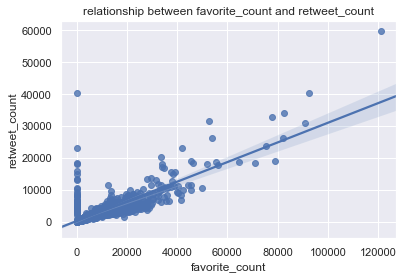

In [48]:
#plot relationship between 'favorite_count' and 'retweet_count'
sns.set(color_codes=True)
sns.regplot(x = df.favorite_count, y=df.retweet_count);
plt.title('relationship between favorite_count and retweet_count')

> Neither 'favorite_count' or 'retweet_count' will affect the rating. This is also evident and logic because the rating is parsed from tweets directly than voted by readers.<br>
However, we can see there is a strong positive linear relationship between 'favorite_count' and 'retweet_count' (coefficient = 0.82): more 'likes' should generate more 'retweet_count'.

### Q3-Do different 'stage's affect the 'rating'?

In [49]:
#calculate descirptive statistics of rating for different dog stages
df.groupby('stage')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
None,1133.0,12.446854,53.916196,1.0,10.0,11.0,12.0,1776.0
doggo,36.0,11.555556,1.646545,8.0,11.0,11.0,13.0,14.0
doggo/pupper,6.0,10.500000,2.810694,5.0,10.5,12.0,12.0,12.0
floofer,5.0,11.400000,1.140175,10.0,11.0,11.0,12.0,13.0
pupper,149.0,10.771812,2.124887,5.0,10.0,11.0,12.0,27.0
puppo,17.0,11.941176,1.344925,9.0,11.0,12.0,13.0,14.0


> It seems that whatever the stage for the dog is, the majority of the rating is between 10-12.

### Q4-The sources of tweets

In [50]:
#calculate the percetage of each source
df_source_percentage = df.source.value_counts()/df.source.shape[0]
df_source_percentage

Twitter for iPhone    0.979198
Twitter Web Client    0.014116
TweetDeck             0.006686
Name: source, dtype: float64

Text(0.5,1,'Percentage of diffrent sources of tweets')

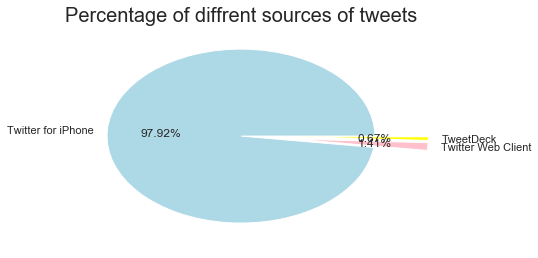

In [51]:
#visualisation the source percentage in a pie chart
sizes = np.array(df_source_percentage)
labels = ['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck']
colors = ['LightBlue', 'Pink', 'Yellow']
explode = [0, 0.4, 0.4]
plt.pie(sizes, labels=labels, colors = colors, explode = explode, autopct='%.2f%%');
plt.title('Percentage of diffrent sources of tweets', fontsize=20)

> Almost 98% of tweets come from iPhone, very few people use the website or TweetDeck for WeRateDogs.

### Q5-Which dog breeds are most recognised by algorithm?

In [52]:
#count the number of tweet for each dog breed and sort the Top 10
top10_breed = df.p1.value_counts().head(10)
top10_breed

golden retriever      102
pembroke               65
labrador retriever     65
chihuahua              47
pug                    41
pomeranian             26
cocker spaniel         23
chow                   22
samoyed                21
toy poodle             21
Name: p1, dtype: int64

Text(0.5,1,'Top 10 dog breeds by recognisation count (under p1)')

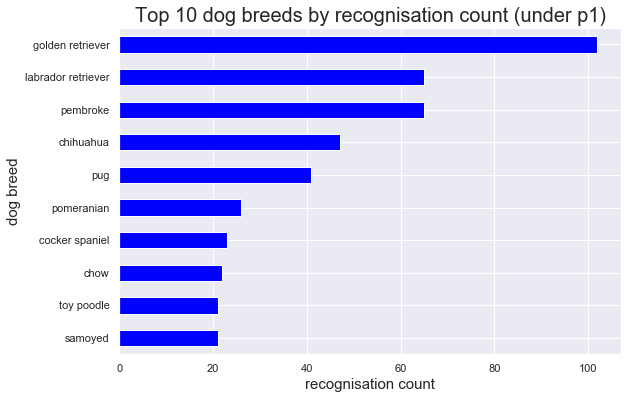

In [53]:
#visualise the Top 1O dog breeds with higher confident probability.
ax = top10_breed.sort_values().plot(kind = 'barh', figsize = (9, 6), color = 'blue');
ax.set_xlabel('recognisation count', fontsize=15)
ax.set_ylabel('dog breed', fontsize=15)
ax.set_title('Top 10 dog breeds by recognisation count (under p1)',fontsize=20)

> From the chart, we can see that after being recognised by a specific algorithm, the most shown breeds in WeRateDogs are Golden, Labrador and Pembroke, followed by Chihuahua and Pug. <br>
The result is interesting and obvious in the meantime. Because lots of my friends have Golden, Labrador and Pembroke. Regarding myself, I am an owner of a tiny Chihuahua.

### Q6-Which dog breeds are recognised with higher confident probability under 1st prediction?

In [54]:
#calculate the mean of p1_conf by breed group of the images with dog identified and sort the means by descending order
df_p1conf_mean = df[df.p1_dog == True].groupby('p1').p1_conf.mean().sort_values(ascending=False)

In [55]:
#list Top 10 dog breeds recognised with higher confident probability under 1st predition
top10_mean=df_p1conf_mean.iloc[:10]
## or top10=df_p1conf_mean.head(10)
top10_mean

p1
komondor                0.971406
weimaraner              0.965741
clumber                 0.946718
brittany spaniel        0.888837
keeshond                0.844431
bernese mountain dog    0.798474
bull mastiff            0.796050
doberman                0.786625
french bulldog          0.775889
blenheim spaniel        0.755276
Name: p1_conf, dtype: float64

Text(0.5,1,'Top 10 dog breeds recognised (under p1)')

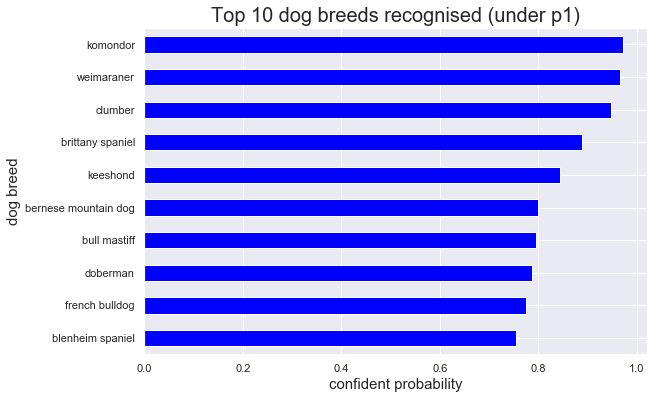

In [56]:
#visualise the Top 1O dog breeds with higher confident probability.
ax = top10_mean.sort_values().plot(kind = 'barh', figsize = (9, 6), color = 'blue');
ax.set_xlabel('confident probability', fontsize=15)
ax.set_ylabel('dog breed', fontsize=15)
ax.set_title('Top 10 dog breeds recognised (under p1)',fontsize=20)

> The algorithm could identify more correctly for the following breeds: Komondor, Weimaraner, Dumber and Brittany. 

### Q7-Does more images provides will increase the confident probability for dog breed identification under 1st prediction?

In [57]:
#calculate the mean of p1_conf by number of images provided and sort the values by descending order.
df_image = df[df.p1_dog==True].groupby('img_num').p1_conf.mean().sort_values(ascending=False)
df_image

img_num
4    0.846720
3    0.722612
2    0.678246
1    0.595306
Name: p1_conf, dtype: float64

Text(0.5,1,'relationship between numbers of image and confident probability (under p1)')

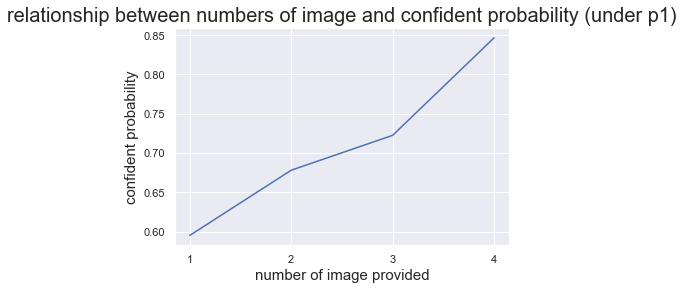

In [58]:
#visualise the relationship between numbers of image and predition confident probability
df_image.plot();
plt.xticks(np.arange(1,5,1))
plt.xlabel('number of image provided', fontsize=15)
plt.ylabel('confident probability', fontsize=15)
plt.title('relationship between numbers of image and confident probability (under p1)', fontsize=20)

> As we can see, the mean of confident probability increases with more pictures of dog provided, which could help ameliorate the result of prediction.

### Q8-Does the algorithm for dog breed identification perform well?

In [33]:
#verify if the image is correctly identified under 3 predictions
#extract the list of image without dog under 3 predictions: df_notdog
df_notdog = df_breeds_clean[(df_breeds_clean.p1_dog == False) & (df_breeds_clean.p2_dog == False)&(df_breeds_clean.p3_dog == False)]
df_notdog

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed sloth,0.914671,False,otter,1.525000e-02,False,great grey owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,african hunting dog,1.260080e-02,False,coyote,5.735010e-05,False


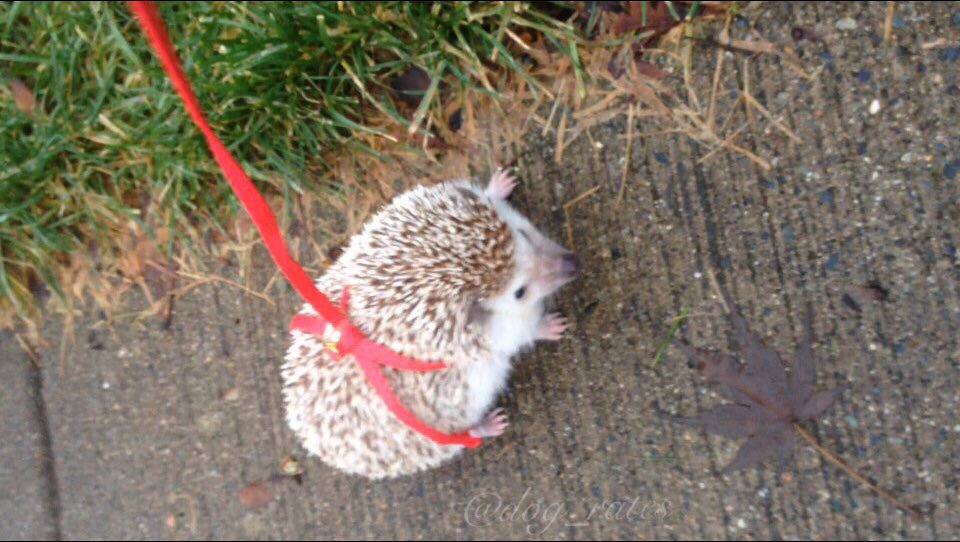

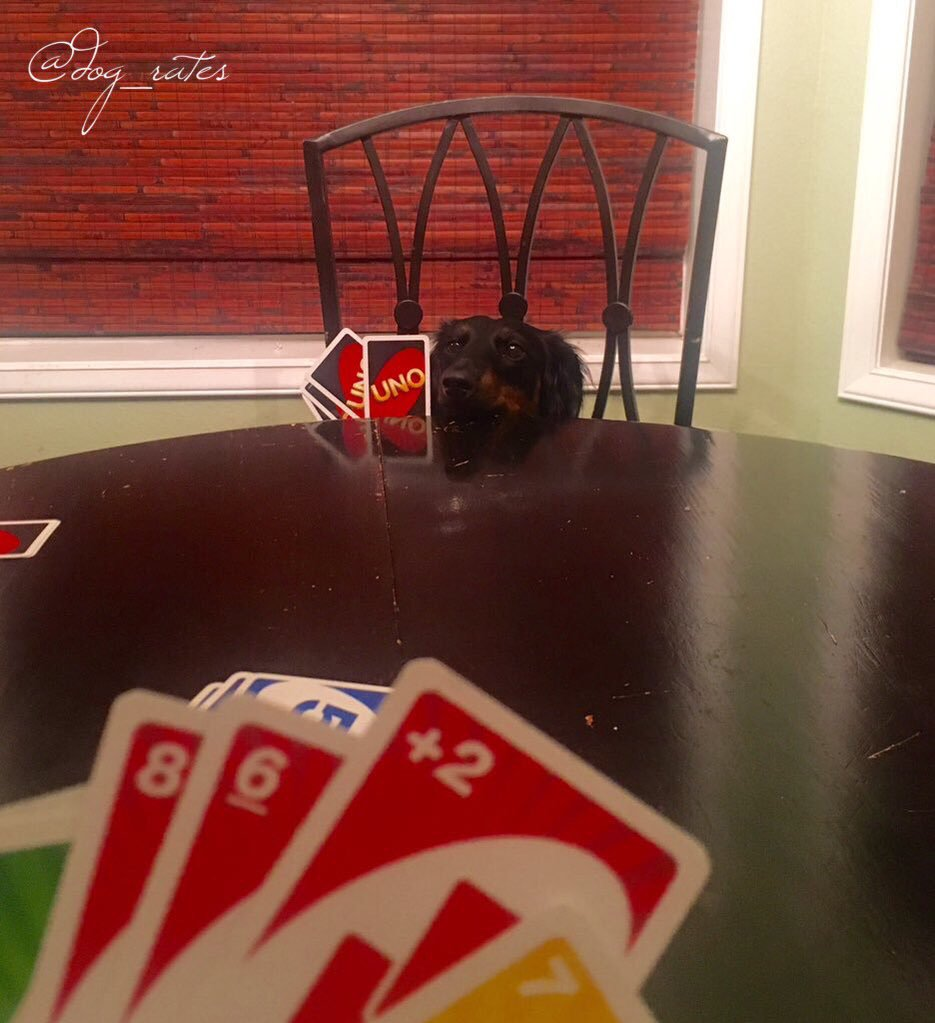

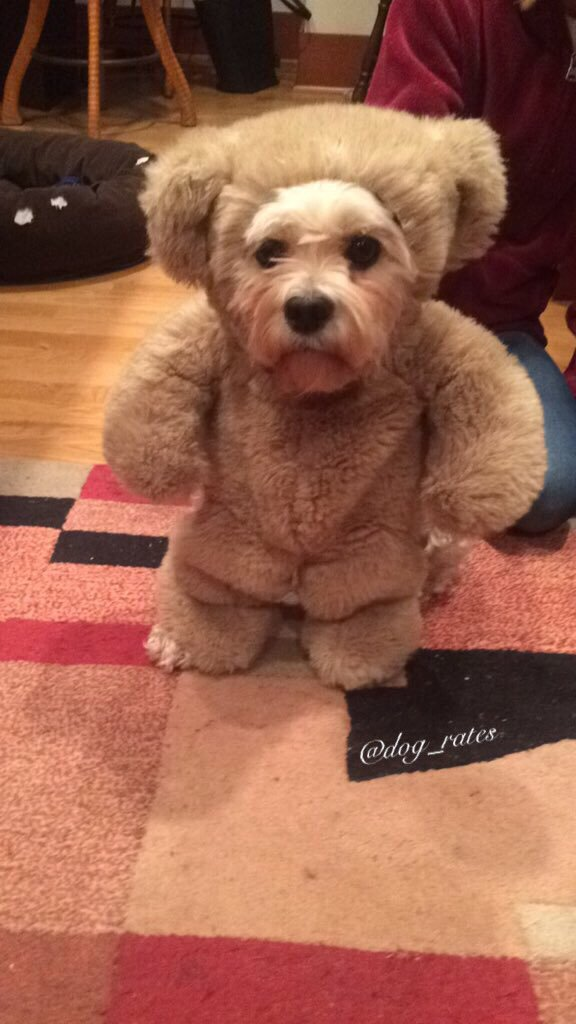

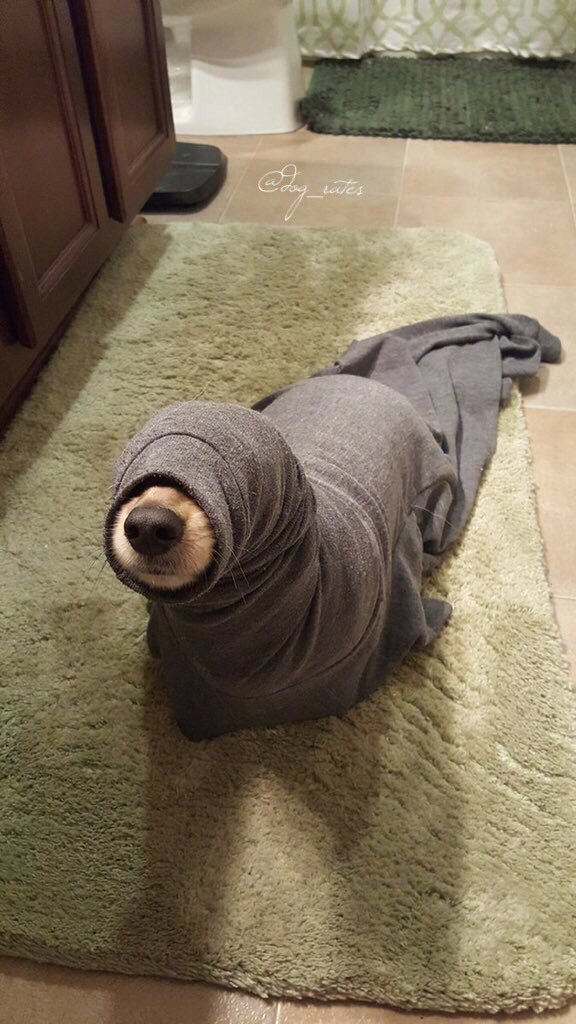

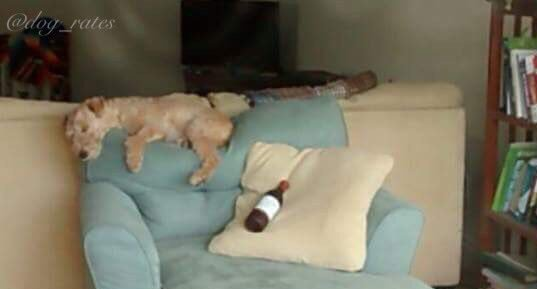

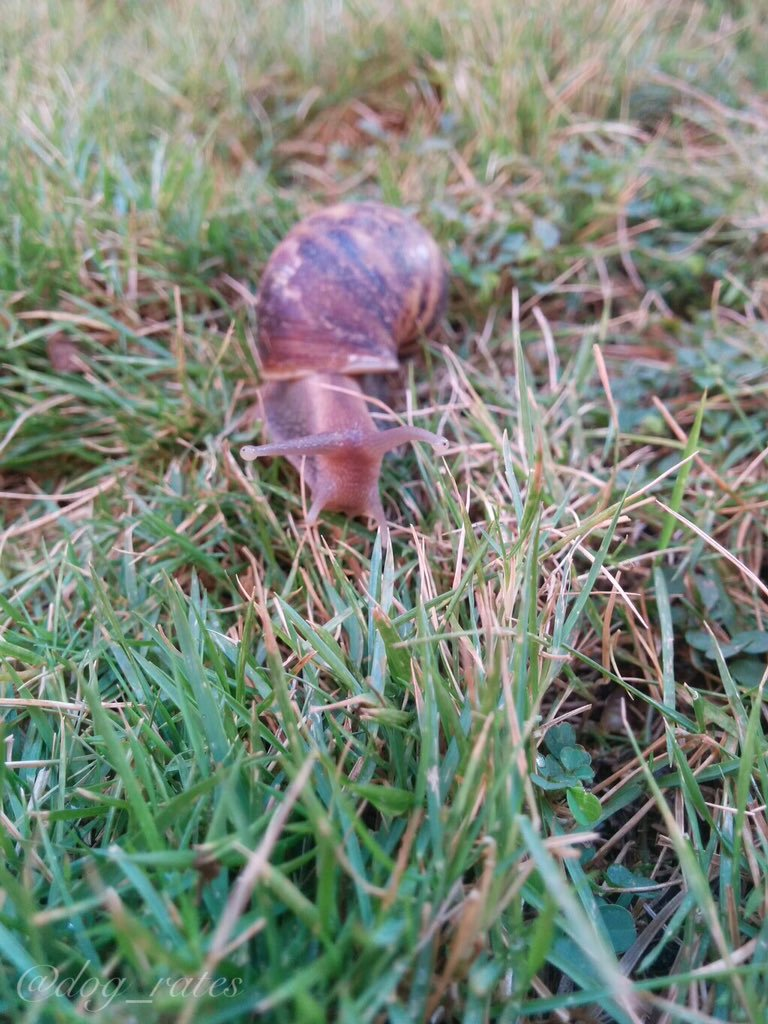

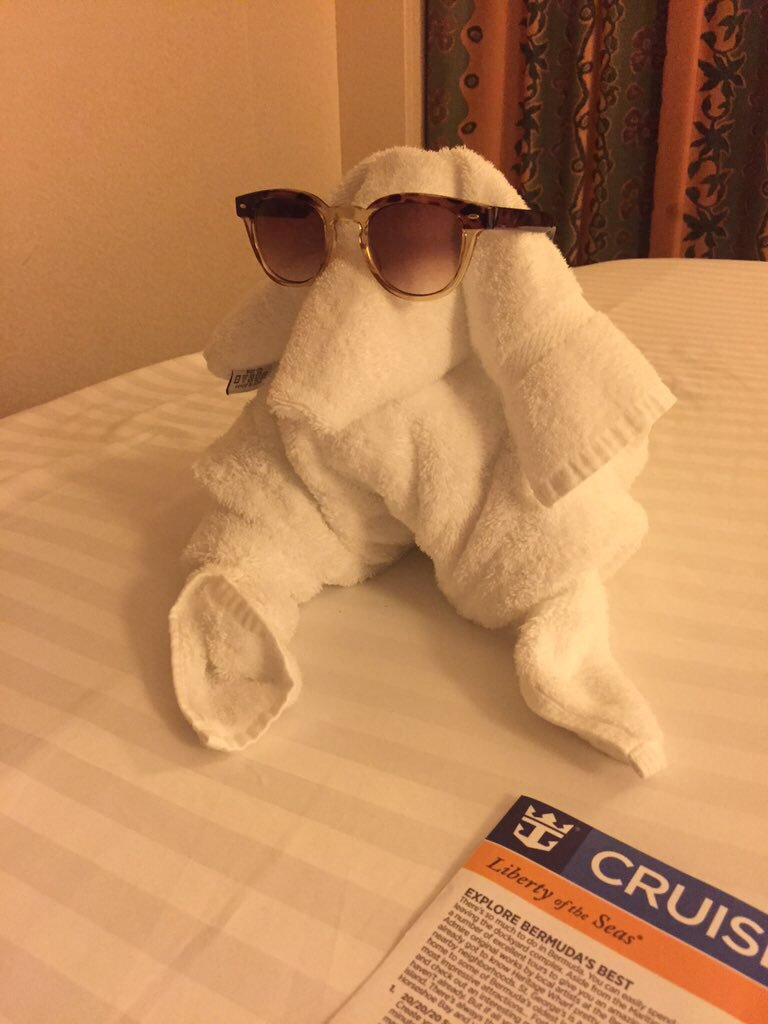

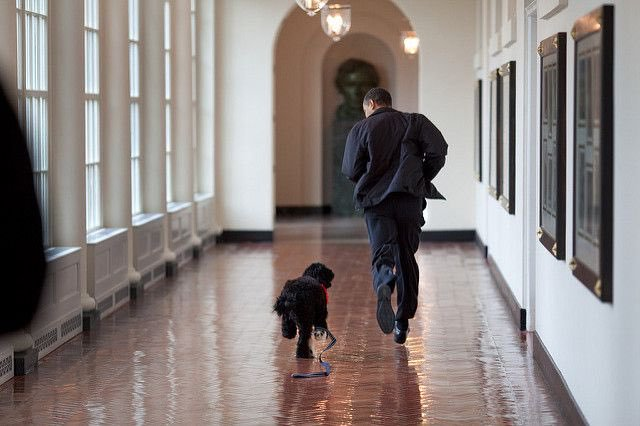

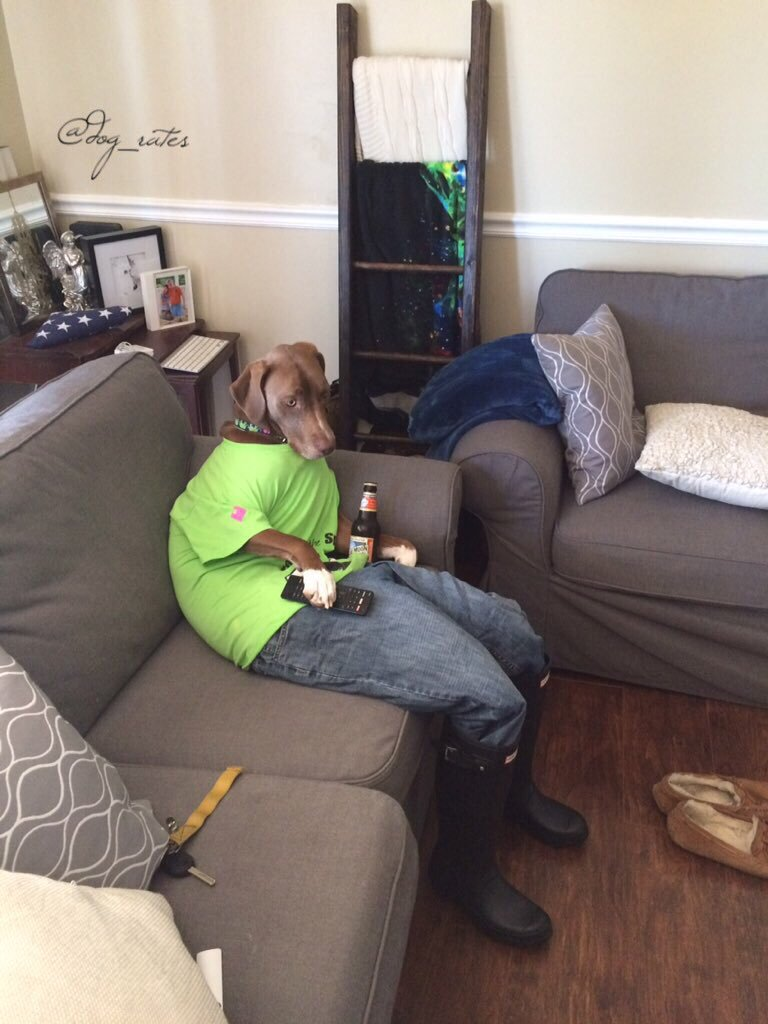

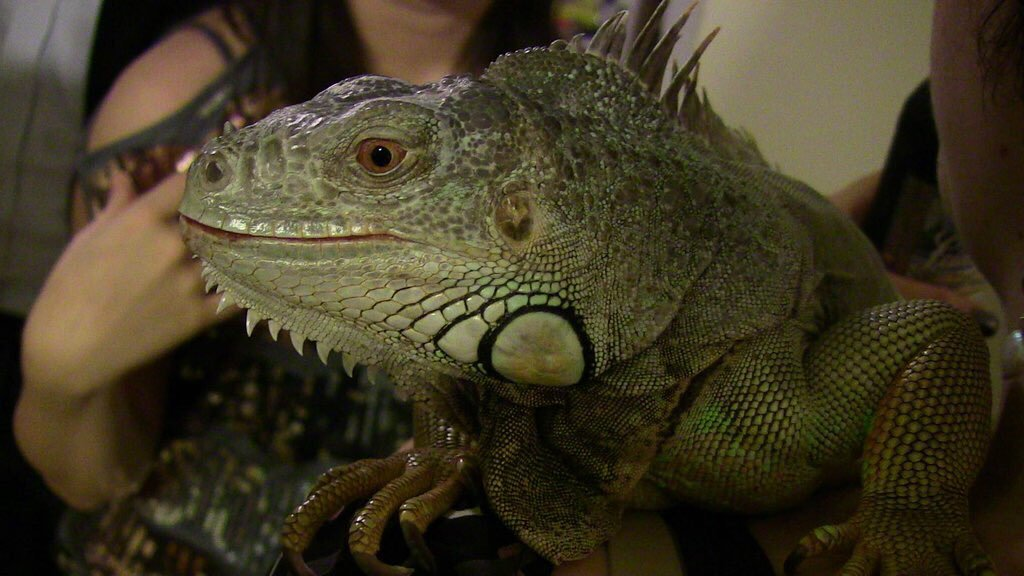

In [59]:
#display 10 random pictures in the list of df_notdog and visually verify if there is dog identified incorrectly.
import random
from IPython.core.display import Image, display

samples = np.random.choice(df_notdog.jpg_url,size = 10, replace = None)
for sample in samples:
    display(Image(sample, width=200, unconfined=True))

> In order to check the performance of the algorithm identifying being dogs or not, I choose to display randomly 10 pictures which are categorised in ‘NoDog’.<br>
We can see that the dogs' breed identification algorithm is actually not bad, but could be ameliorated. Some errors may be due to being dog size too small compared to other things in the picture, others are because of incomplete dog’s body shown or its color being similar to the item in the picture.